### Operations:
a. Data cleaning<br>
b. Data integration<br>
c. Data transformation<br>
d. Error correcting<br>

In [1]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('airquality_data.csv', encoding='cp1252' ,low_memory=False)

In [7]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [9]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

### Data Cleaning

In [10]:
# Change data type from float64 to float32 for Space Complexity
df['so2'] = df['so2'].astype('float32')
df['no2'] = df['no2'].astype('float32')
df['rspm'] = df['rspm'].astype('float32')
df['spm'] = df['spm'].astype('float32')
df['date'] = df['date'].astype('string')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float32
 7   no2                          419509 non-null  float32
 8   rspm                         395520 non-null  float32
 9   spm                          198355 non-null  float32
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  string 
dtyp

In [11]:
df=df.drop_duplicates()

In [12]:
df.isna().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149466
type                             5357
so2                             34632
no2                             16222
rspm                            40035
spm                            236908
location_monitoring_station     27303
pm2_5                          425754
date                                7
dtype: int64

In [13]:
percent_missing = df.isnull().sum() * 100 / len(df)

In [14]:
percent_missing.sort_values(ascending=False)

pm2_5                          97.859185
spm                            54.453097
agency                         34.354630
stn_code                       33.115973
rspm                            9.202010
so2                             7.960135
location_monitoring_station     6.275571
no2                             3.728613
type                            1.231302
date                            0.001609
sampling_date                   0.000690
location                        0.000690
state                           0.000000
dtype: float64

In [11]:
df=df.drop(['stn_code', 'agency','sampling_date','location_monitoring_station','pm2_5'], axis = 1)

In [15]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [16]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [14]:
col_var = ['state', 'location', 'type','date']
col_num = ['so2','no2','rspm','spm']

In [17]:
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'string':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

In [18]:
df.isna().sum()

stn_code                       0
sampling_date                  0
state                          0
location                       0
agency                         0
type                           0
so2                            0
no2                            0
rspm                           0
spm                            0
location_monitoring_station    0
pm2_5                          0
date                           0
dtype: int64

In [19]:
df

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",4.800000,17.400000,108.871712,220.774796,Regional Office,40.791467,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,Maharashtra State Pollution Control Board,Industrial Area,3.100000,7.000000,108.871712,220.774796,Regional Office,40.791467,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",6.200000,28.500000,108.871712,220.774796,Regional Office,40.791467,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",6.300000,14.700000,108.871712,220.774796,Regional Office,40.791467,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,Maharashtra State Pollution Control Board,Industrial Area,4.700000,7.500000,108.871712,220.774796,Regional Office,40.791467,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.000000,50.000000,143.000000,220.774796,"Inside Rampal Industries,ULUBERIA",40.791467,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.000000,46.000000,171.000000,220.774796,"Inside Rampal Industries,ULUBERIA",40.791467,2015-12-29
435739,193,19-03-15,andaman-and-nicobar-islands,Guwahati,Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",10.830467,25.823299,108.871712,220.774796,Regional Office,40.791467,2015-03-19
435740,193,19-03-15,Lakshadweep,Guwahati,Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",10.830467,25.823299,108.871712,220.774796,Regional Office,40.791467,2015-03-19


In [20]:
df.isna().sum()

stn_code                       0
sampling_date                  0
state                          0
location                       0
agency                         0
type                           0
so2                            0
no2                            0
rspm                           0
spm                            0
location_monitoring_station    0
pm2_5                          0
date                           0
dtype: int64


# Data integration

In [21]:
subSet1 = df[['state', 'type']]
subSet2 = df[['state','location']]

In [22]:
subSet1.head()

,state,type
0,Andhra Pradesh,"Residential, Rural and other Areas"
1,Andhra Pradesh,Industrial Area
2,Andhra Pradesh,"Residential, Rural and other Areas"
3,Andhra Pradesh,"Residential, Rural and other Areas"
4,Andhra Pradesh,Industrial Area


In [23]:
subSet2.head()

,state,location
0,Andhra Pradesh,Hyderabad
1,Andhra Pradesh,Hyderabad
2,Andhra Pradesh,Hyderabad
3,Andhra Pradesh,Hyderabad
4,Andhra Pradesh,Hyderabad


In [24]:
concatenated_df = pd.concat([subSet1, subSet2], axis=1)

In [25]:
concatenated_df

,state,type,state,location
0,Andhra Pradesh,"Residential, Rural and other Areas",Andhra Pradesh,Hyderabad
1,Andhra Pradesh,Industrial Area,Andhra Pradesh,Hyderabad
2,Andhra Pradesh,"Residential, Rural and other Areas",Andhra Pradesh,Hyderabad
3,Andhra Pradesh,"Residential, Rural and other Areas",Andhra Pradesh,Hyderabad
4,Andhra Pradesh,Industrial Area,Andhra Pradesh,Hyderabad
...,...,...,...,...
435737,West Bengal,RIRUO,West Bengal,ULUBERIA
435738,West Bengal,RIRUO,West Bengal,ULUBERIA
435739,andaman-and-nicobar-islands,"Residential, Rural and other Areas",andaman-and-nicobar-islands,Guwahati
435740,Lakshadweep,"Residential, Rural and other Areas",Lakshadweep,Guwahati


### Error Correcting

In [26]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5 * IQR
    outlier_mask = (column < Q1 - threshold) | (column > Q3 + threshold)
    return column[~outlier_mask]

In [27]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [28]:
# Remove outliers for each column using a loop
col_name = ['so2', 'no2', 'rspm', 'spm']
for col in col_name:
    df[col] = remove_outliers(df[col])

In [30]:
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


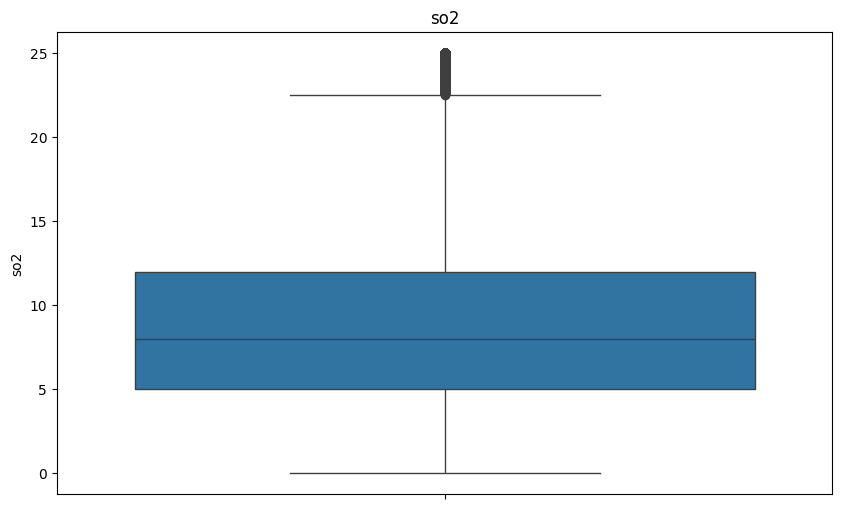

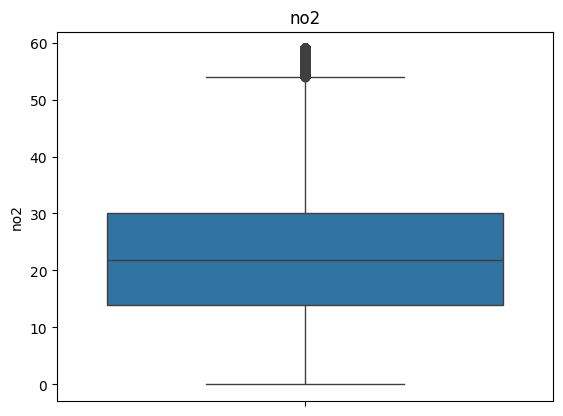

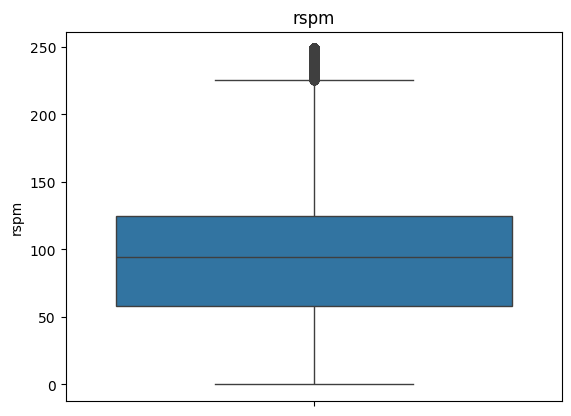

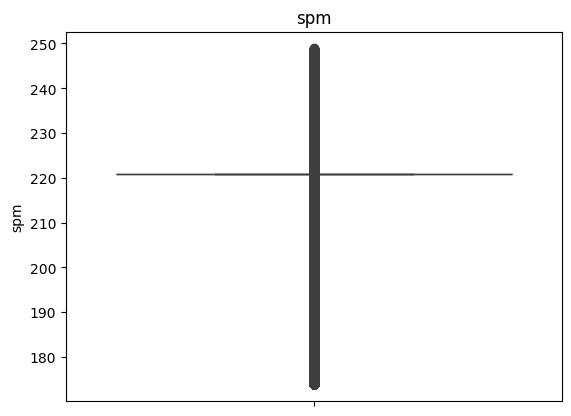

In [31]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

for col in col_name:
    sns.boxplot(data=df[col])
    plt.title(col)
    plt.show()

## Data Transform

In [33]:
from sklearn.preprocessing import LabelEncoder

col_label= ['state','location','type']
# Initialize LabelEncoder

encoder = LabelEncoder()
# Iterate over columns
for col in df.columns:
        # Fit and transform the column
        df[col] = encoder.fit_transform(df[col])

In [34]:
df

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,59,5358,0,114,33,6,446,1489,2030,464,757,173,213
1,60,5358,0,114,33,1,197,250,2030,464,757,173,213
2,61,5358,0,114,33,6,790,3096,2030,464,757,173,213
3,59,5421,0,114,33,6,823,1144,2030,464,757,173,214
4,60,5421,0,114,33,1,427,301,2030,464,757,173,214
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,744,3079,35,282,63,3,2888,5307,2534,464,387,173,5059
435738,744,3971,35,282,63,3,2809,5113,3098,464,387,173,5064
435739,105,1971,36,100,33,6,1638,2696,2030,464,757,173,4779
435740,105,1971,17,100,33,6,1638,2696,2030,464,757,173,4779
